### * 필요한 Package import 

In [17]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [3]:
import matplotlib
matplotlib.use('TkAgg')

## 1. Data 탐색

- train 데이터의 수가 작고, 변수의 수가 많으므로 overfitting 문제 발생할 수 있음.   
modeling 시,Regularization techniques를 통해 overfitting 가능성을 방지해야함 

In [2]:
df = pd.read_csv('train.csv')
df.shape

(137, 43)

In [3]:
test_df = pd.read_csv('test.csv')
test_df.shape

(100000, 42)

In [4]:
df.head(3)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0


In [18]:
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P35,P36,P37,revenue,Days Open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4.014599,4.445255,4.357664,4.379562,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,5.970803,6.284672,3.744526,15.187193,2.192263,0.569343,0.430657,0.007299,0.554745,0.437956
std,2.910391,1.617549,0.990671,1.065028,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,3.212891,3.974087,1.693540,0.480708,1.471258,0.496985,0.496985,0.085436,0.498818,0.497956
min,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,1.000000,2.000000,1.000000,13.955160,0.422000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,14.913812,1.188000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,4.000000,15.186642,1.854000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,7.000000,7.000000,5.000000,15.457732,2.669000,1.000000,1.000000,0.000000,1.000000,1.000000
max,12.000000,8.000000,8.000000,8.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,15.000000,20.000000,10.000000,16.795974,6.893000,1.000000,1.000000,1.000000,1.000000,1.000000


- 전체 row/column 기준으로 확인하고자 할 경우

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

display_all(df.head().transpose())

,0,1,2,3,4
Id,0,1,2,3,4
Open Date,07/17/1999,02/14/2008,03/09/2013,02/02/2012,05/09/2009
City,İstanbul,Ankara,Diyarbakır,Tokat,Gaziantep
City Group,Big Cities,Big Cities,Other,Other,Other
Type,IL,FC,IL,IL,IL
P1,4,4,2,6,3
P2,5,5,4,4.5,4
P3,4,4,2,6,3
P4,4,4,5,6,4
P5,2,1,2,4,2


In [9]:
df.isnull().sum().sort_index()/len(df)

City          0.0
City Group    0.0
Id            0.0
Open Date     0.0
P1            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
P16           0.0
P17           0.0
P18           0.0
P19           0.0
P2            0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
P28           0.0
P29           0.0
P3            0.0
P30           0.0
P31           0.0
P32           0.0
P33           0.0
P34           0.0
P35           0.0
P36           0.0
P37           0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
Type          0.0
revenue       0.0
dtype: float64

In [8]:
import matplotlib
# Agg backend runs without a display
matplotlib.use('tkagg')

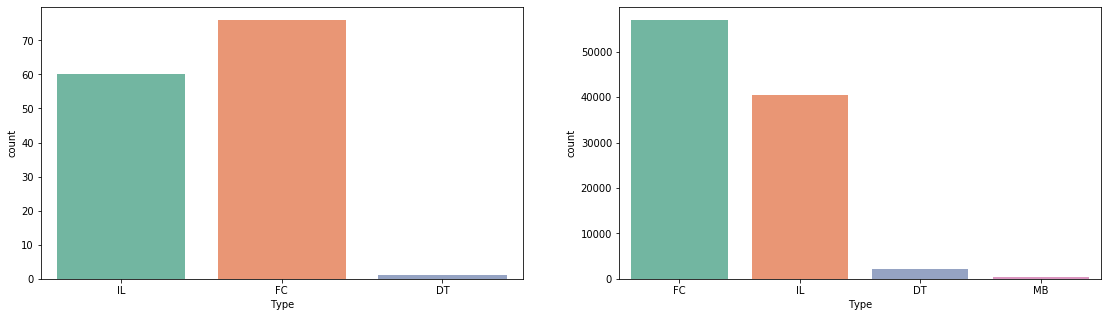

In [9]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df['Type'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test_df['Type'],palette="Set2", ax=ax[1]);
fig.show()

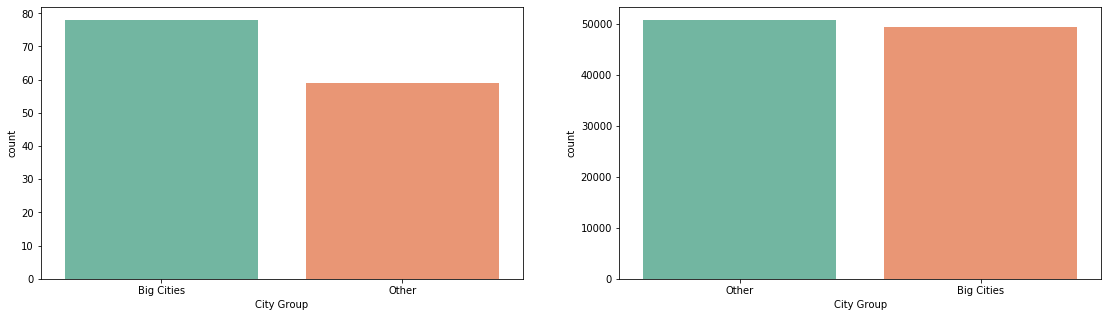

In [10]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df['City Group'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test_df['City Group'],palette="Set2", ax=ax[1]);
fig.show()

In [13]:
(df['City'].nunique(), test_df['City'].nunique())

(34, 57)

- test set에서 새로운 TYPE인 MB는 기존 DT로 변경 > 그냥 OTHERS로 하는게 나을 것 같음 

In [5]:
test_df.loc[test_df['Type']=='MB', 'Type'] = 'DT'

In [6]:
df.drop('City', axis=1, inplace=True)
df.drop('Id',axis=1,inplace=True)
test_df.drop('City', axis=1, inplace=True)

In [7]:
pd.to_datetime(df['Open Date']).max()

Timestamp('2014-01-25 00:00:00')

* 도래일 구하기 

In [8]:
def days(before_date, after_date) : 
    return (after_date - before_date).dt.days

In [9]:
import datetime
df['Open Date']  = pd.to_datetime(df['Open Date'])
test_df['Open Date']  = pd.to_datetime(test_df['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)

# scale days open
df['Days Open'] = days(df['Open Date'], launch_date) / 1000
test_df['Days Open'] = days(test_df['Open Date'], launch_date) / 1000
df.drop('Open Date', axis=1, inplace=True)
test_df.drop('Open Date', axis=1, inplace=True)

In [10]:
df[['Days Open']].head(3)

,Days Open
0,5.728
1,2.594
2,0.744


In [11]:
df.head(3)

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days Open
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753.0,5.728
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131.0,2.594
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2055379.0,0.744


In [64]:
# 컬럼명이 'P'로 시작하는 컬럼 기준 

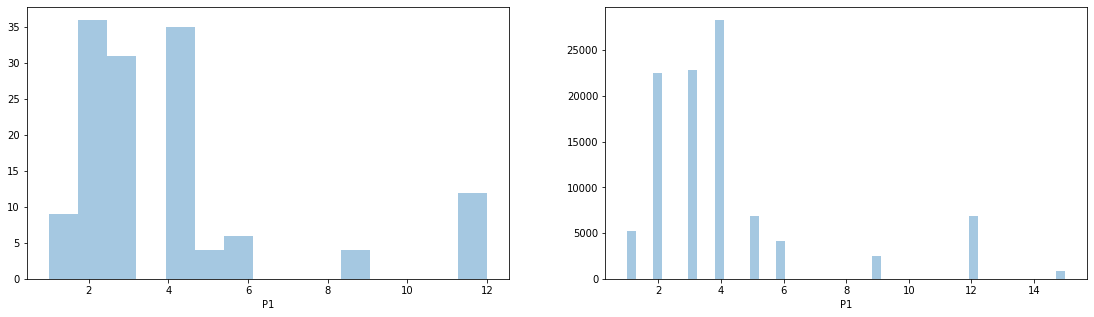

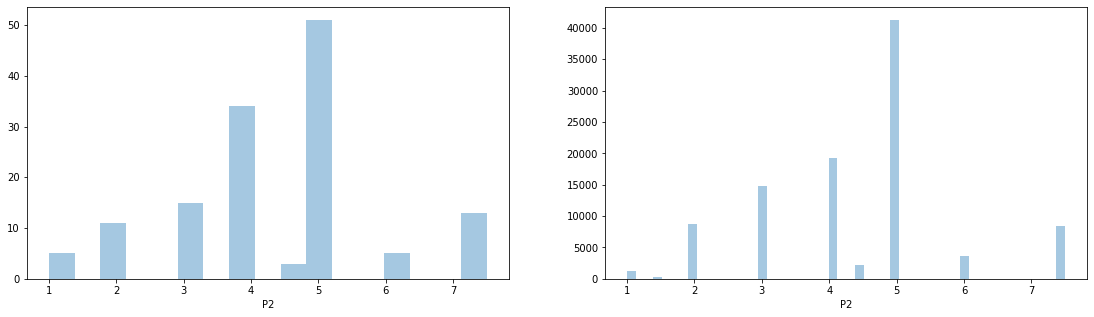

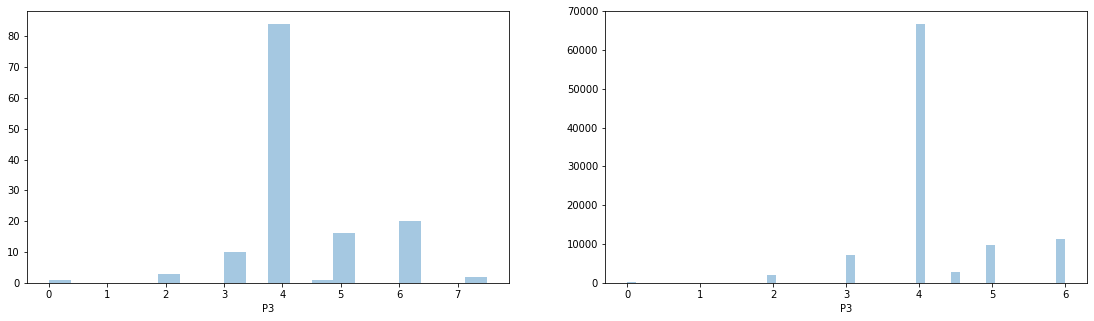

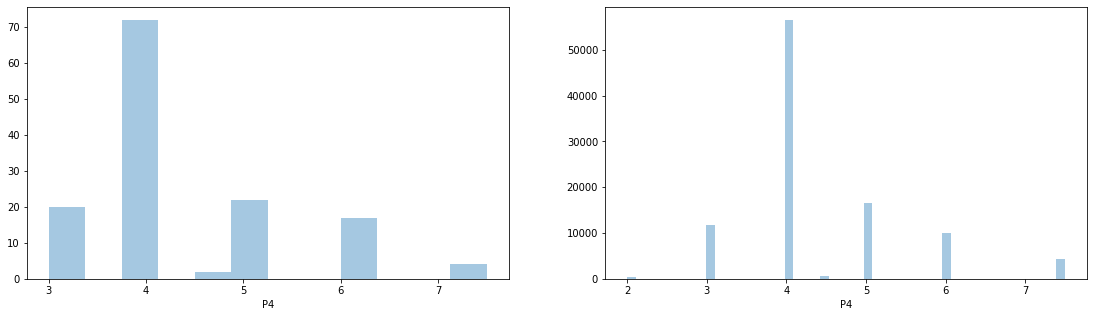

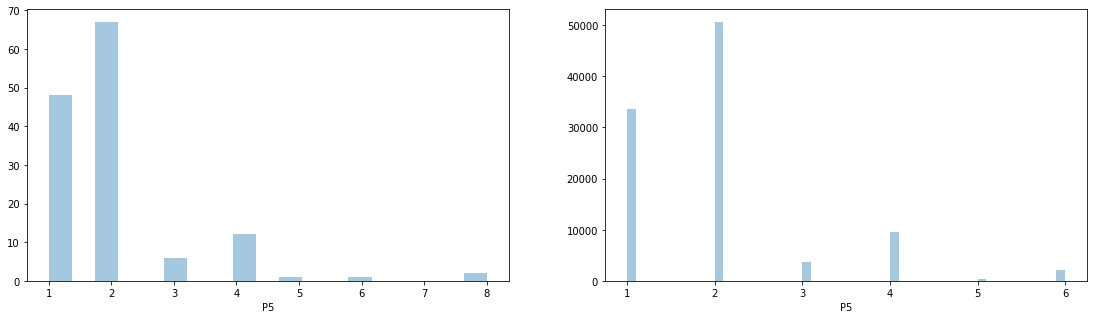

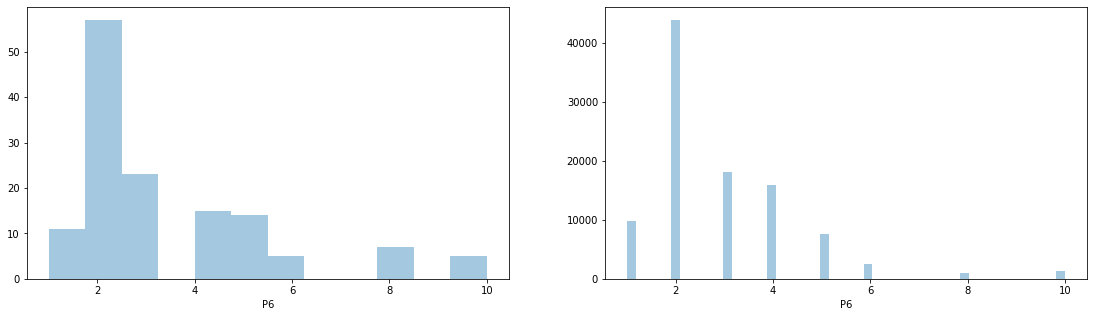

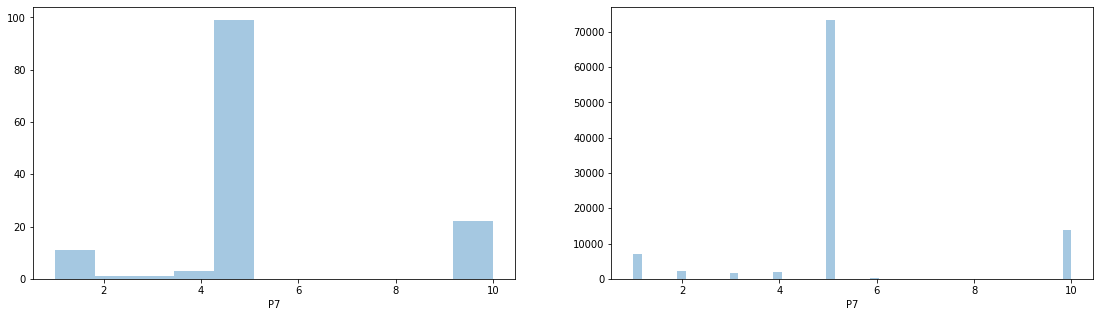

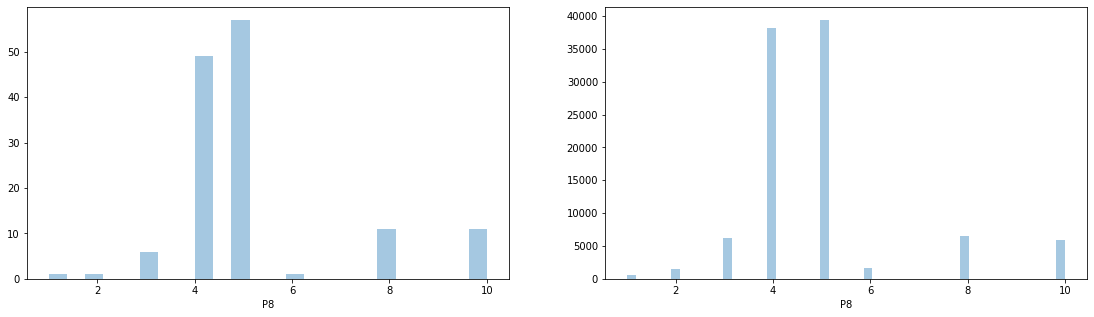

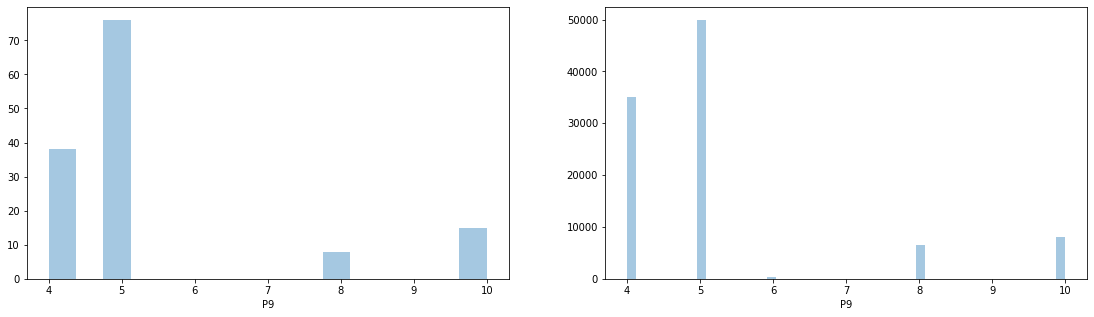

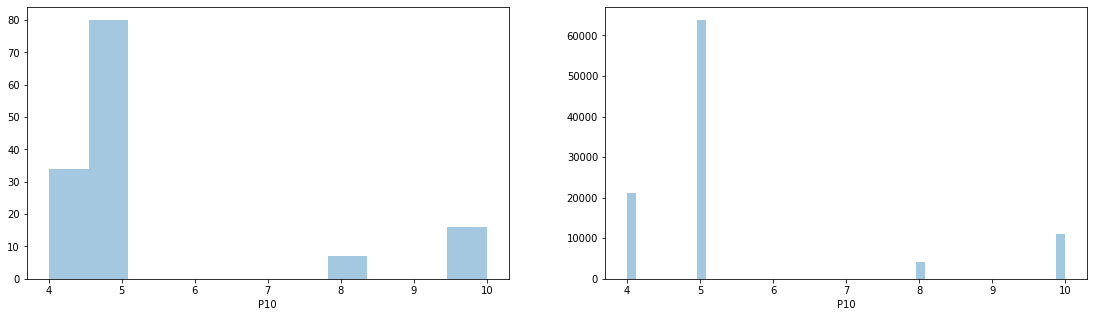

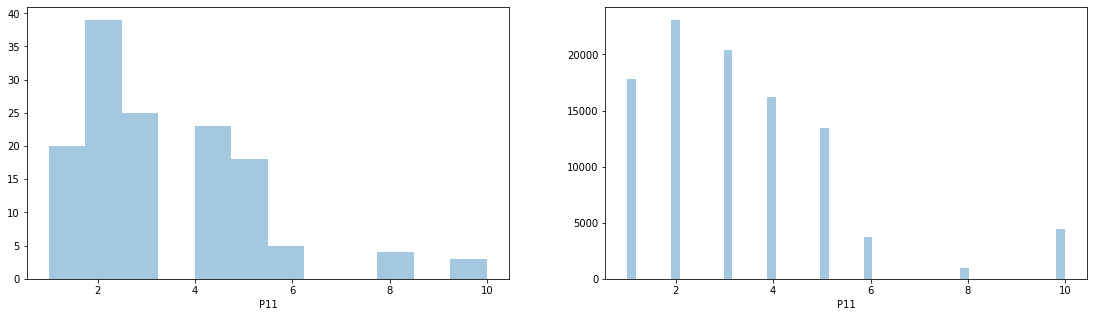

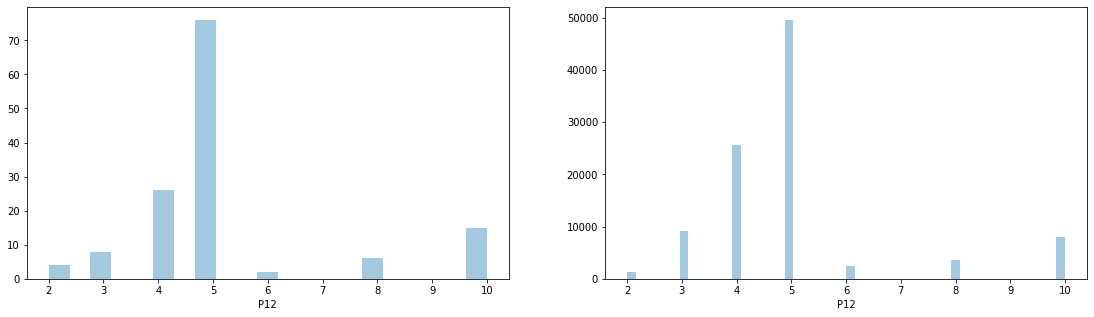

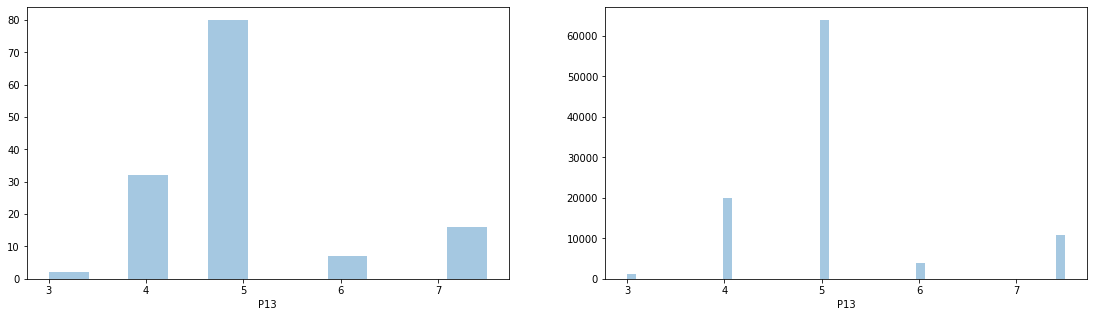

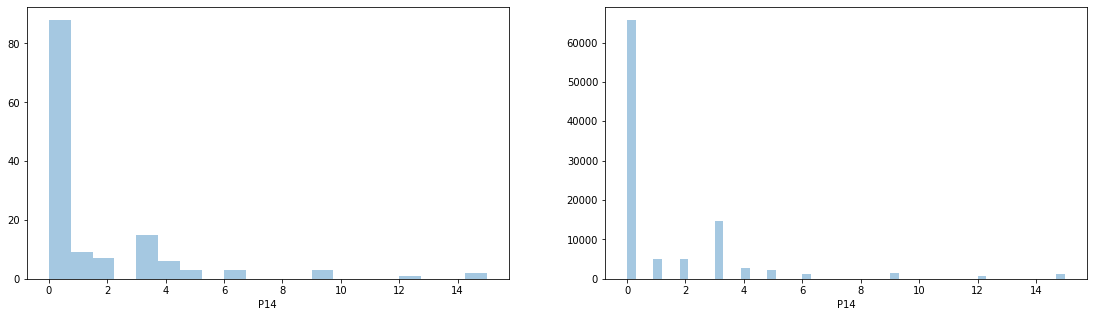

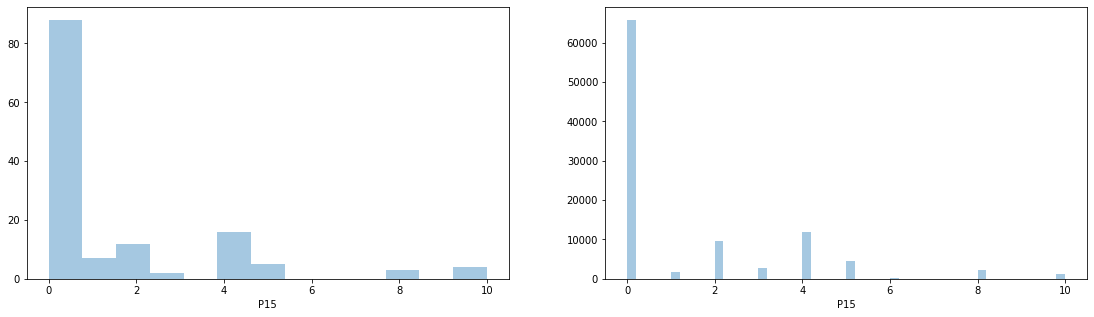

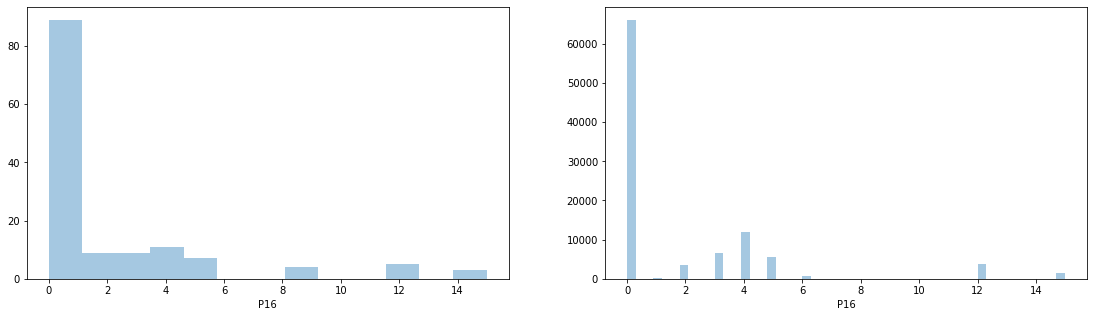

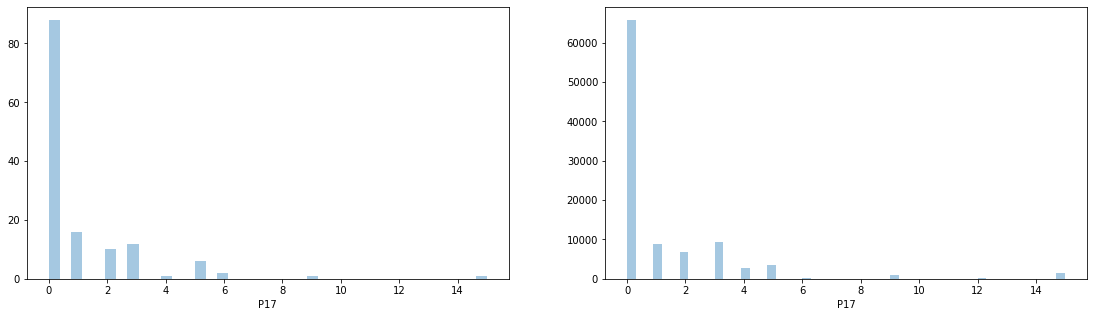

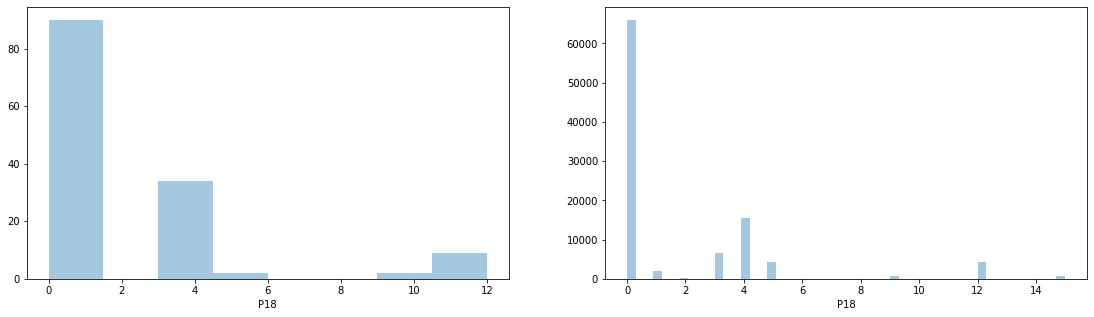

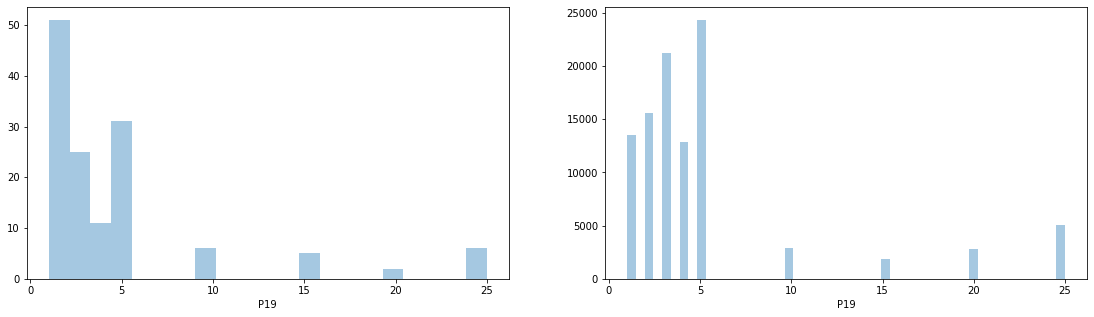

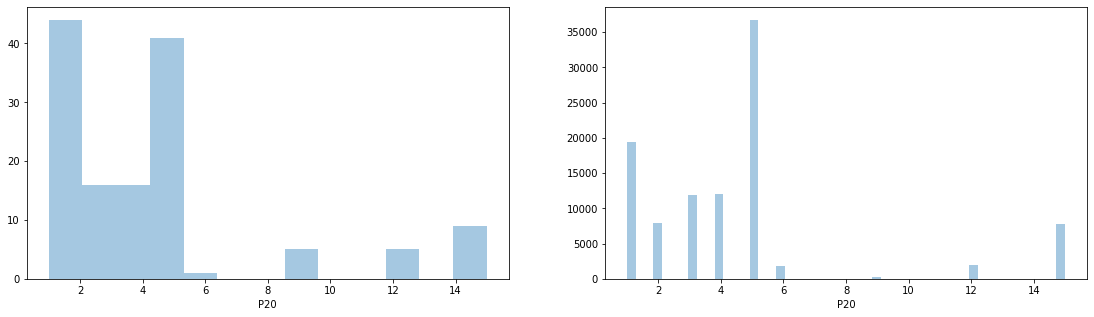

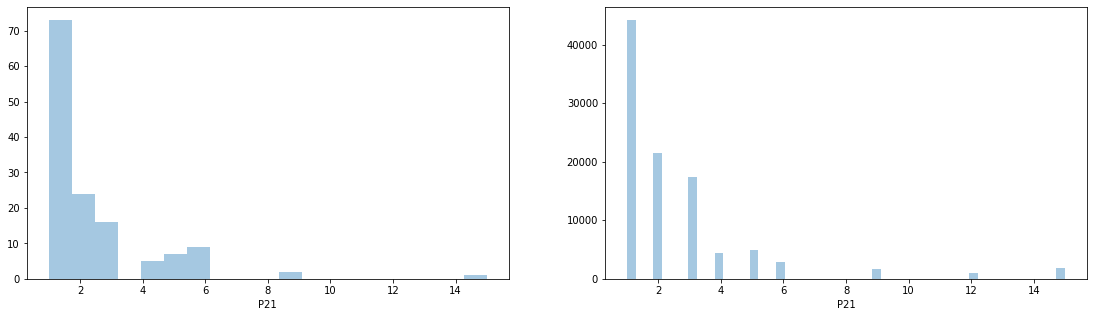

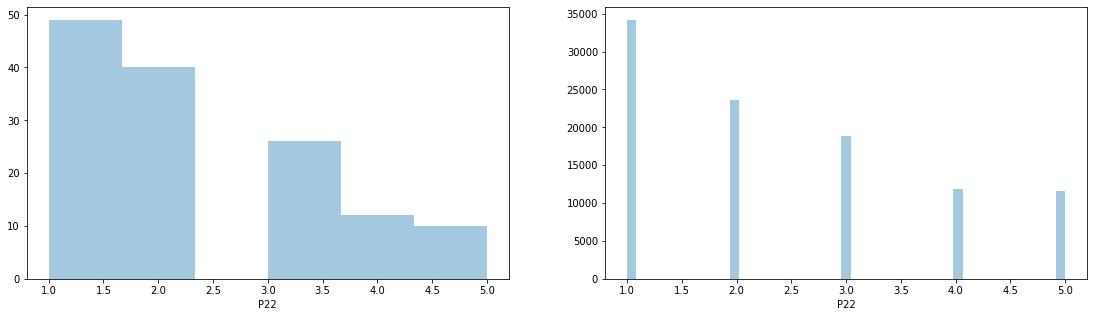

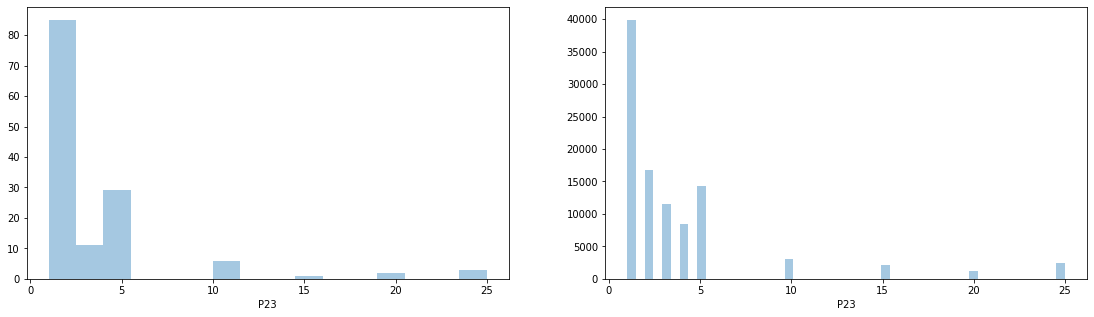

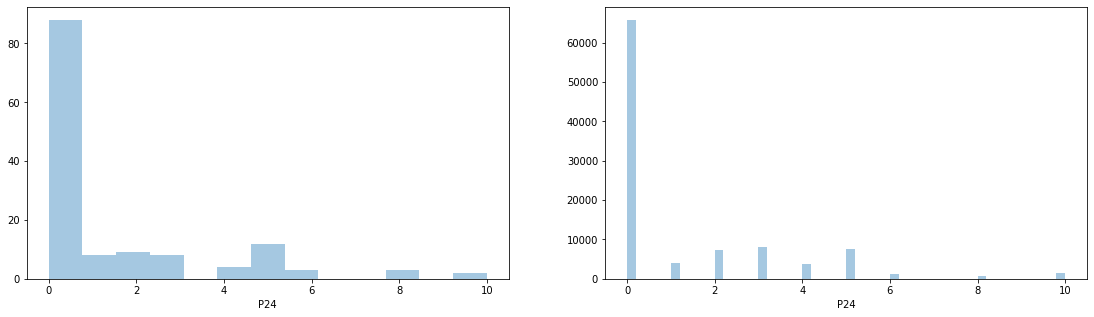

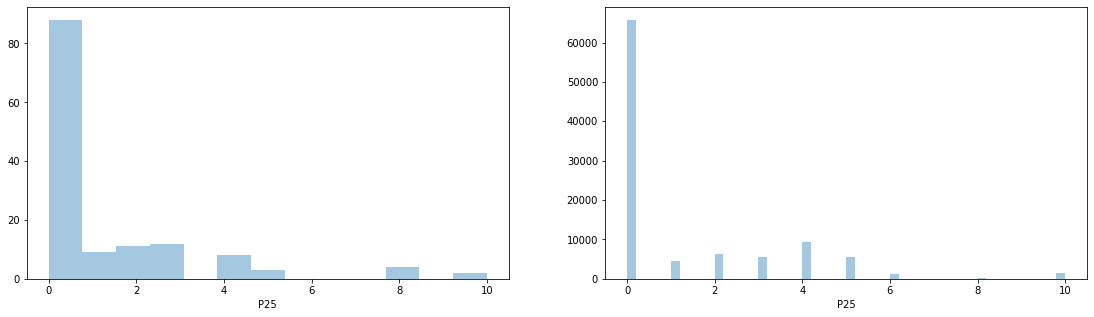

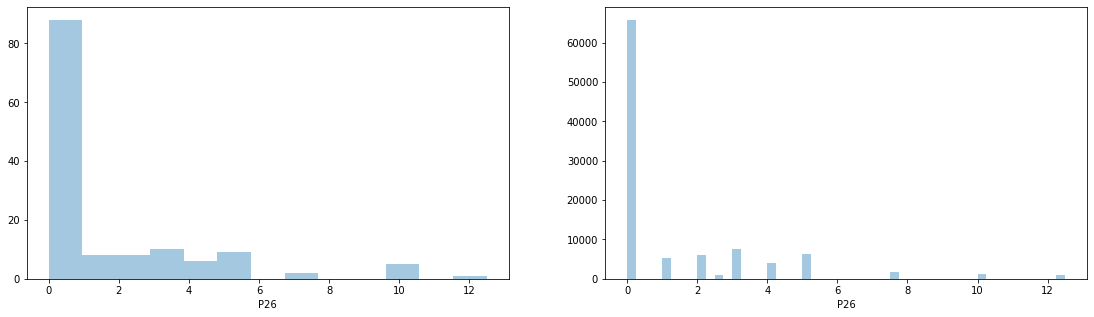

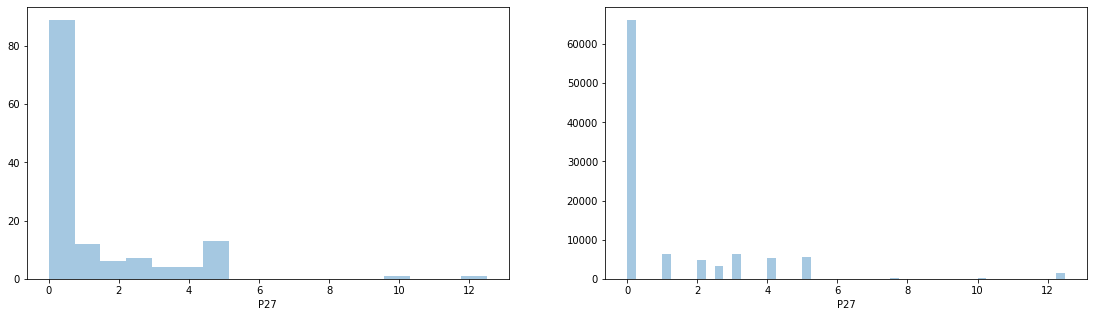

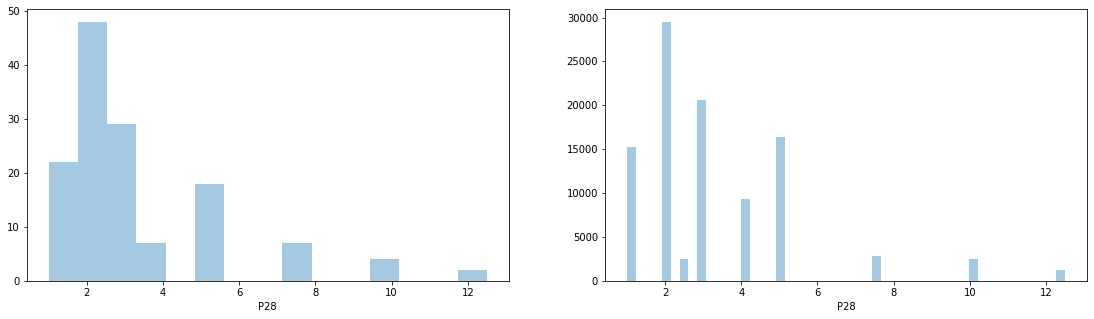

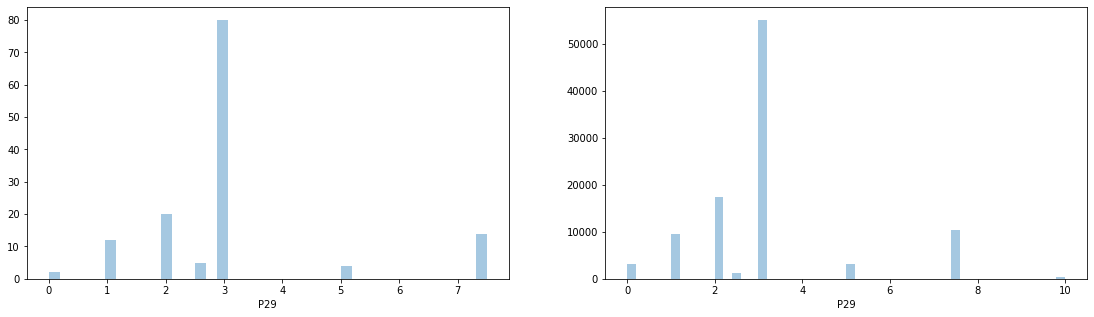

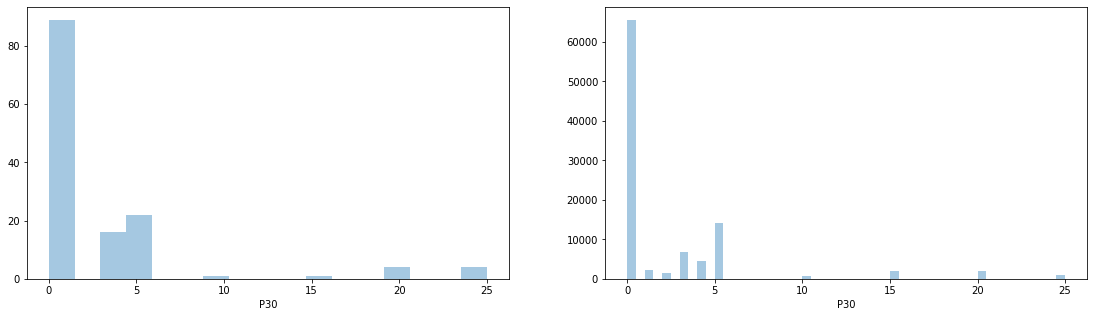

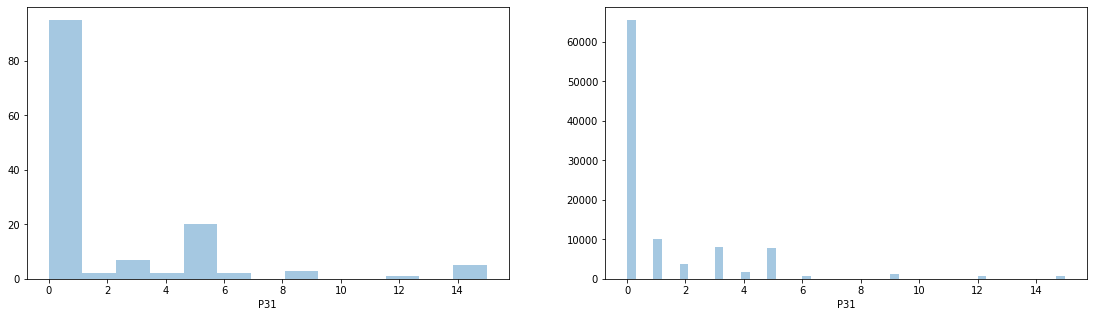

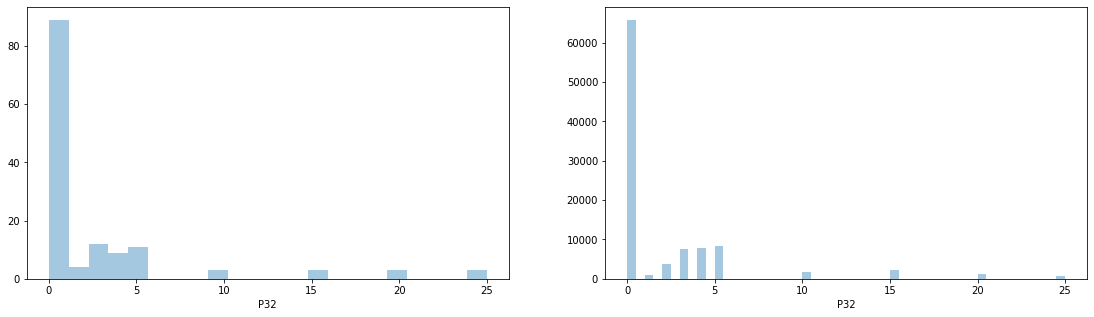

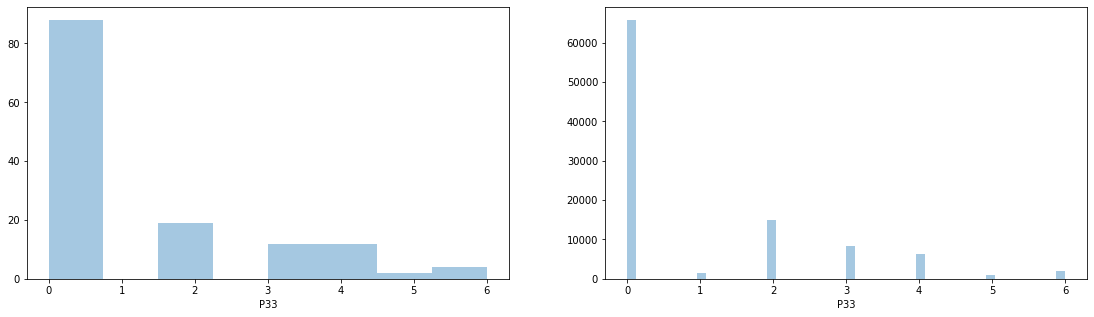

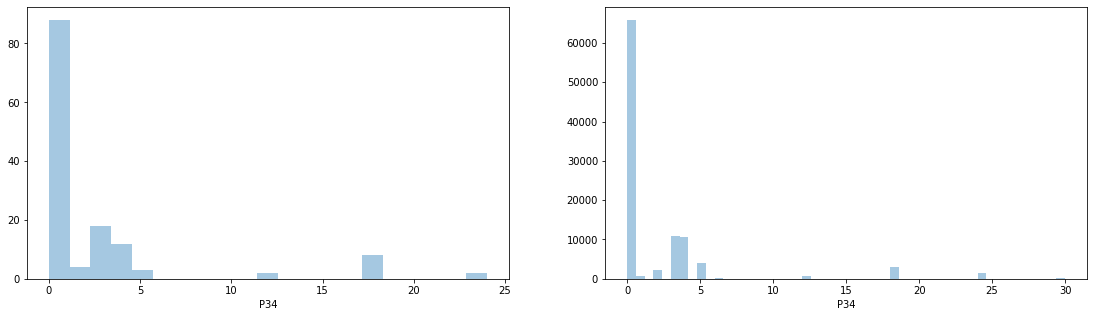

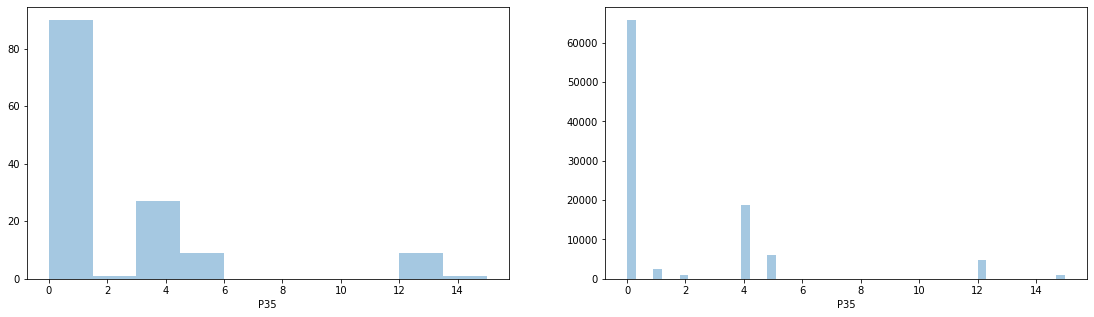

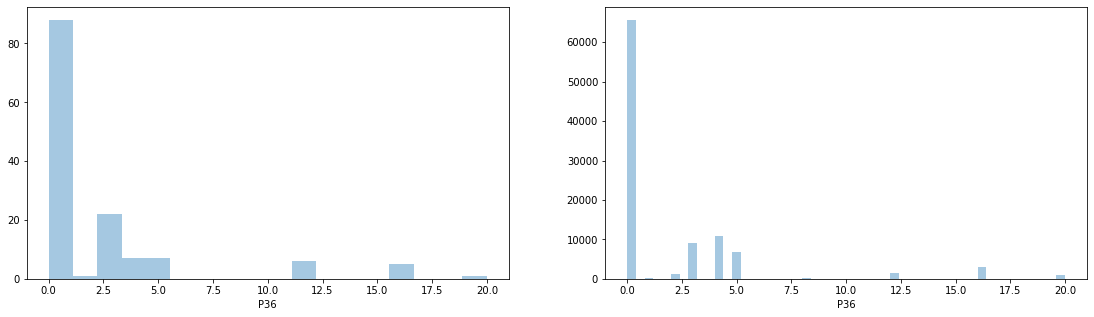

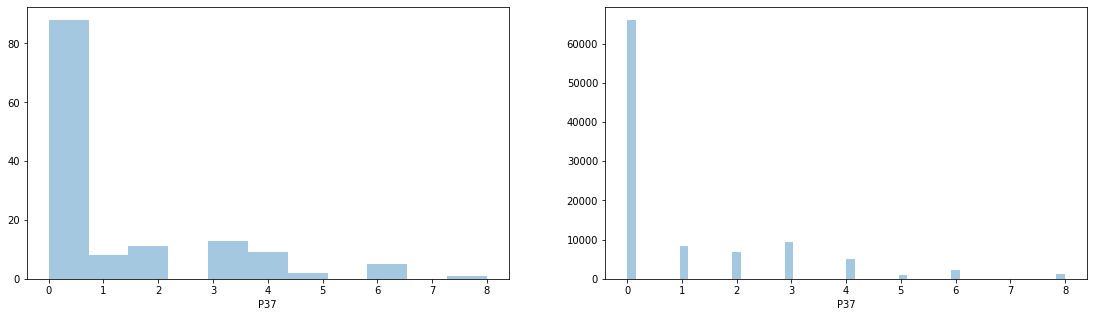

In [23]:
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df['P{}'.format(i)], ax=ax[0], kde=False);
    g2 = sns.distplot(test_df['P{}'.format(i)], ax=ax[1], kde=False);
    fig.show()

In [65]:
#df.dtypes

- target 변수가 정규성을 띄고 있는지 확인 

In [82]:
np.log1p(df['revenue'])

0      15.547830
1      15.750379
2      14.535971
3      14.799651
4      15.278005
         ...    
132    15.571227
133    16.041512
134    14.749585
135    15.792038
136    15.666049
Name: revenue, Length: 137, dtype: float64

In [83]:
def target_distribution(df, target, log_trans=False):
    # df : 테이블명
    # target : target컬럼명(연속형) 
    
    if log_trans : 
        result = np.log1p(df[target])
    else :         
        result = df[target]
        
    (mu, sigma) = norm.fit(result)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
    ax1 = sns.distplot(result , fit=norm, ax=ax1)
    ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
    ax1.set_ylabel('Frequency')
    ax1.set_title(target+' Distribution')
    ax2 = stats.probplot(result, plot=plt)
    f.show();

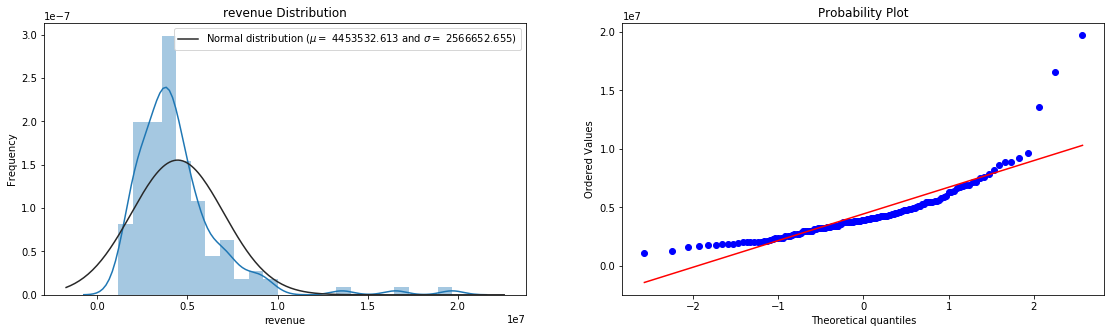

In [84]:
target_distribution(df,'revenue', log_trans=False)

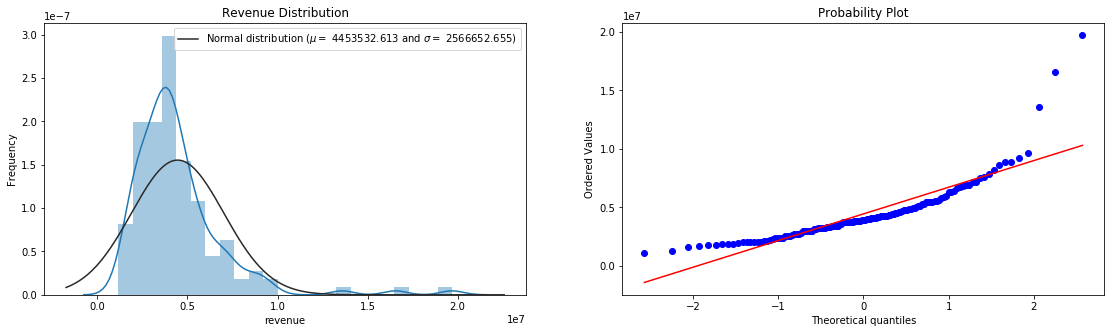

In [25]:
# kaggle
(mu, sigma) = norm.fit(df['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(df['revenue'], plot=plt)
f.show();

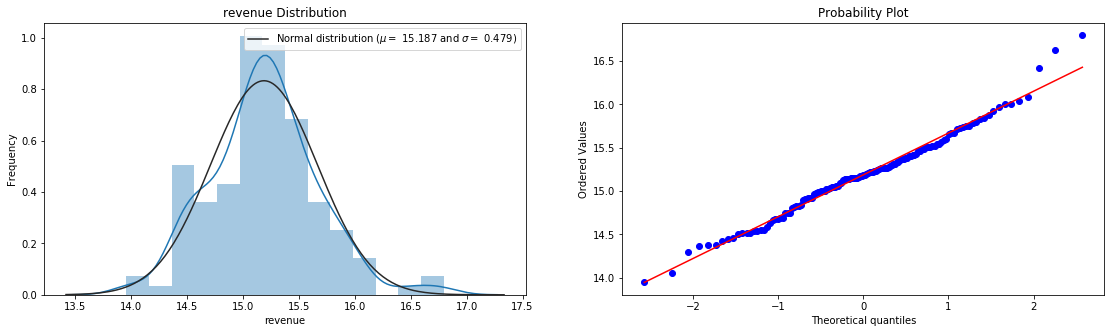

In [85]:
target_distribution(df,'revenue', log_trans=True)

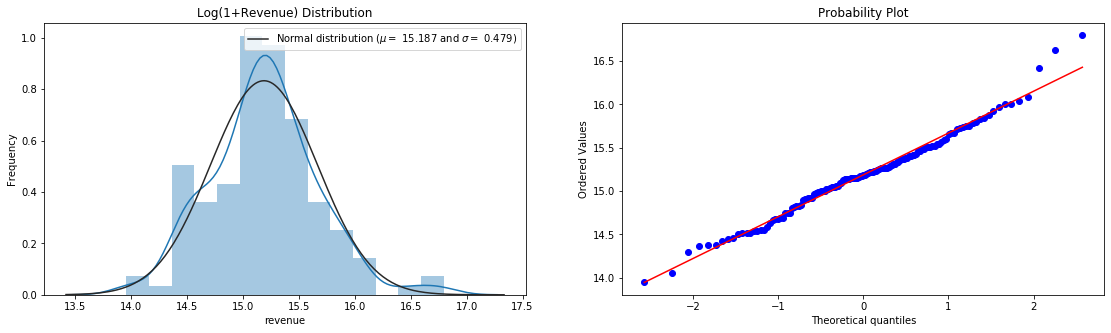

In [26]:
# Revenue is right skewed, taking the log will make it more normally distributed for the linear models
# Remember to use expm1 on predictions to transform back to dollar amount
(mu, sigma) = norm.fit(np.log1p(df['revenue']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(df['revenue']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(df['revenue']), plot=plt)
f.show();

In [27]:
# cap revenue at 10,000,000 for outliers
# df.loc[df['revenue'] > 10000000, 'revenue'] = 10000000

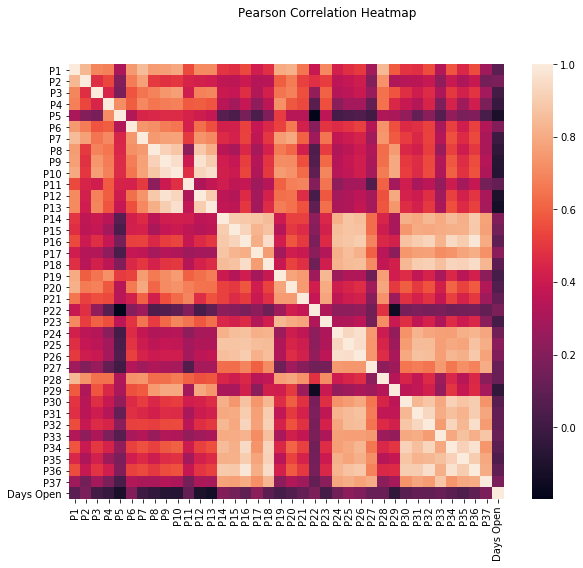

In [28]:
# Correlation between numeric features with revenue
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['revenue','City Group','Type'], axis=1).corr(), square=True)
plt.suptitle('Pearson Correlation Heatmap')
plt.show();

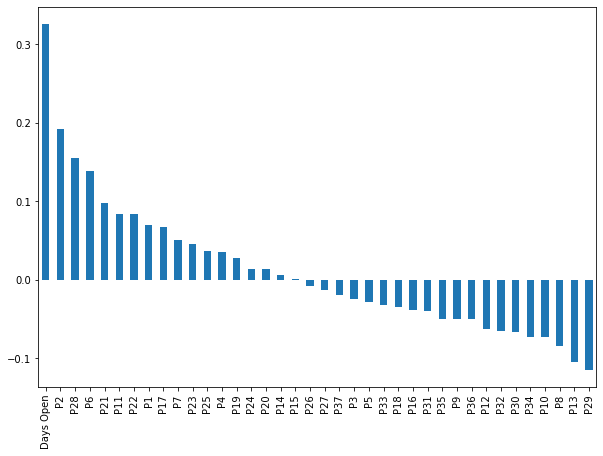

In [29]:
corr_with_revenue = df.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
corr_with_revenue.drop('revenue').plot.bar()
plt.show();

- corr 기준 상위 4개 변수에 대해 revenue와 pairplot 확인 

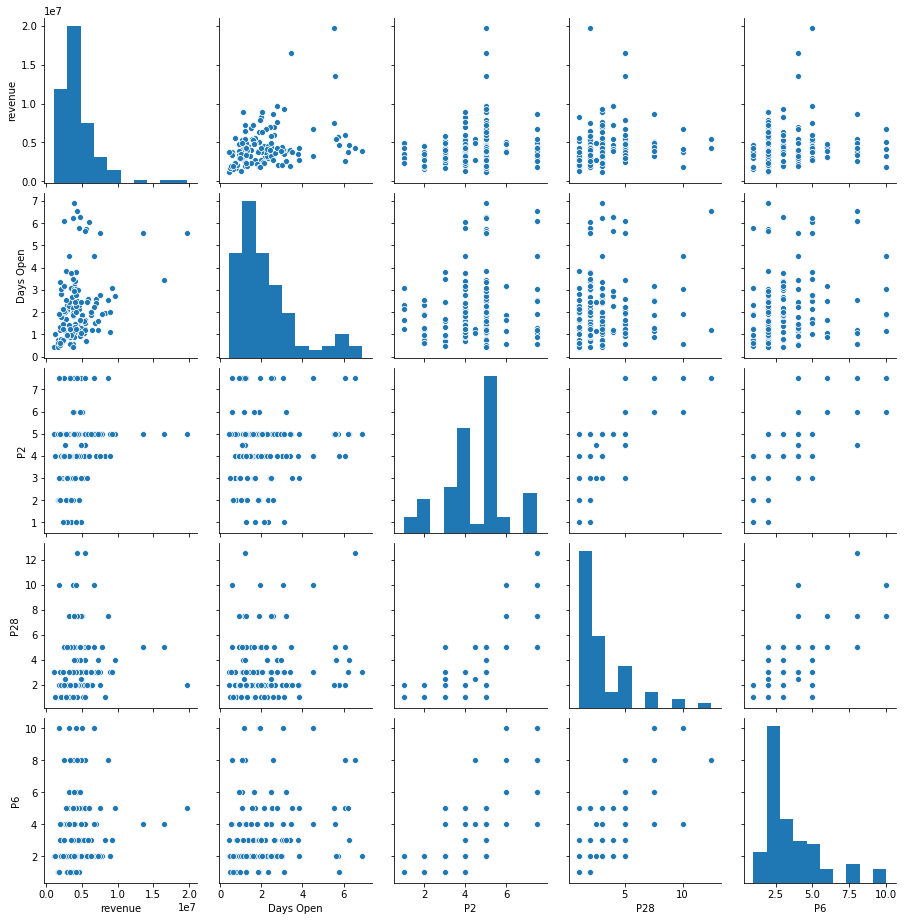

In [30]:
sns.pairplot(df[df.corr()['revenue'].sort_values(ascending=False).index[:5]])
plt.show();

## 2. Feature Engineering

<B> sklearn을 이용해서 결측치 채우기 </B> 
- sklearn에는 결측값을 변환가능 : SimpleImputer, IterativeImputer, KNNImputer  
1) from sklearn.impute import SimpleImputer  
 : Mean(숫자형), Median(숫자형), Mode(문자형)로 결측치를 대체할 수 있음   
2) IterativeImputer : 예측기반 결측치 대체     
3) KNNImputer : 누락 된 값이있는 항목과 항목 사이의 "거리"를 비교해서 결측치를 대체함   

In [12]:
# copy_df = df.copy()
# copy_test_df = test_df.copy()
# numeric_features = df.dtypes[df.dtypes != "object"].index
# skewed_features = df[numeric_features].apply(lambda x: skew(x))
# skewed_features = skewed_features[skewed_features > 0.5].index
# df[skewed_features] = np.log1p(df[skewed_features])
# test_df[skewed_features.drop('revenue')] = np.log1p(test_df[skewed_features.drop('revenue')])
# Above handles skewed features using log transformation
# Below uses multiple imputation for P1-P37, since they are actually categorical
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_train = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
imp_test = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=23)

p_data = ['P'+str(i) for i in range(1,38)]
df[p_data] = np.round(imp_train.fit_transform(df[p_data]))
test_df[p_data] = np.round(imp_test.fit_transform(test_df[p_data]))

In [24]:
# 함수로 변환 

In [23]:
def encoding_object(df, drop_first = False) : 
    # df : 테이블이름
    # drop_first : n-1개의 특성 만들어줄지 말지
    columnsToEncode = df.select_dtypes(include=[object]).columns
    df = pd.get_dummies(df, columns=columnsToEncode, drop_first=drop_first)
    return df 

In [ ]:
df = encoding_object(df)
test_df = encoding_object(test_df)

In [13]:
# drop_first=True for Dummy Encoding for object types, and drop_first=False for OHE
columnsToEncode = df.select_dtypes(include=[object]).columns
df = pd.get_dummies(df, columns=columnsToEncode, drop_first=False)
test_df = pd.get_dummies(test_df, columns=columnsToEncode, drop_first=False)

In [14]:
df['revenue'] = np.log1p(df['revenue'])
X, y = df.drop('revenue', axis=1), df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)

### 1) Ridge and Lasso Regression

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [32]:
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 1.00
Optimal fit_intercept: True
Optimal normalize: True
Optimal solver: saga
Best score: -0.44639779858189615


In [33]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -8.195445432561911
Test r2 score:  0.04058908542769979
Train RMSE: 0.4031
Test RMSE: 0.5413


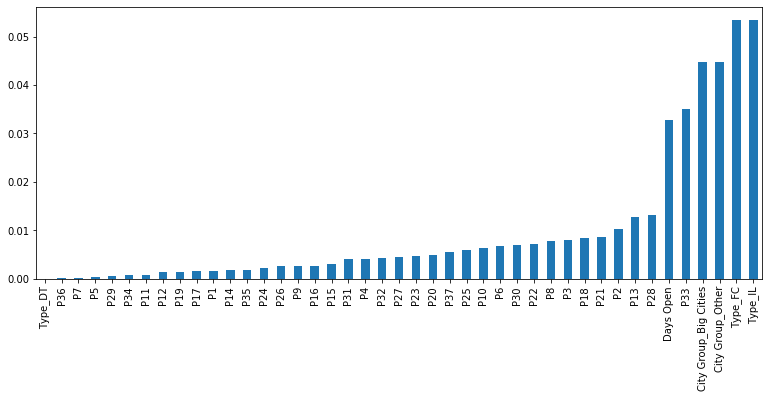

In [37]:
# Ridge Model Feature Importance
ridge_feature_coef = pd.Series(index = X_train.columns, data = np.abs(ridge_model.coef_))
ridge_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

In [35]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {lasso_regressor.best_params_["normalize"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Optimal normalize: True
Best score: -0.4530668566496237


In [36]:
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"], 
                    normalize=lasso_regressor.best_params_["normalize"])
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -327.6628679746241
Test r2 score:  0.02293335570713051
Train RMSE: 0.4508
Test RMSE: 0.5463


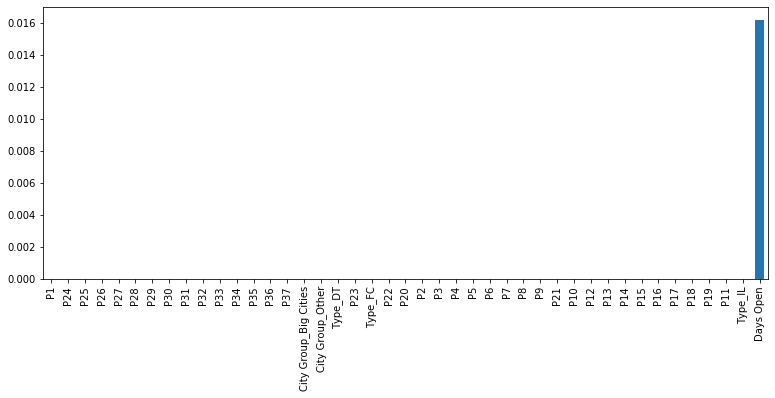

In [37]:
# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = X_train.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

### 2) Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 30
Optimal max_features: 0.6
Optimal min_sample_leaf: 5
Optimal min_samples_split: 12
Optimal n_estimators: 50
Best score: -0.4004939664572861


In [19]:
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.7364176512541227
Test r2 score:  0.2116057859463285
Train RMSE: 0.2926
Test RMSE: 0.4907


- out-of-bag score : 예측이 얼마나 정확한가에 대한 추정을 수치로 나타낸 것

In [25]:
rf_model.oob_score_

0.12379230251771622

40 features with reduction of 6.98%


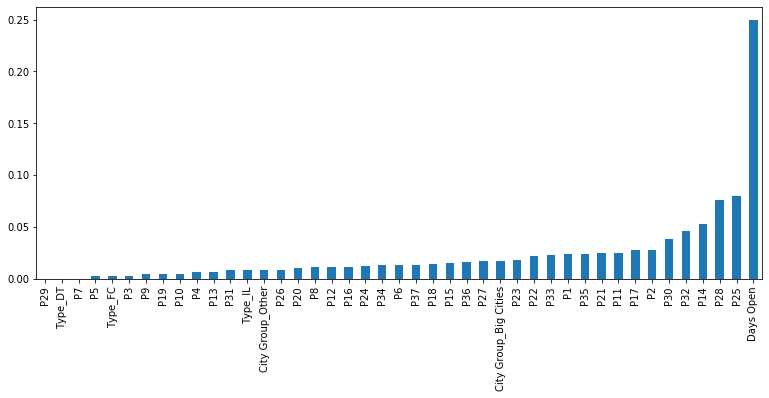

In [20]:
# Random Forest Model Feature Importance
rf_feature_importance = pd.Series(index = X_train.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

In [27]:
submission = pd.DataFrame(columns=['Id','Prediction'])
submission['Id'] = test_df['Id']

In [28]:
rf_pred = rf_model.predict(test_df.drop('Id', axis=1))
submission['Prediction'] = np.expm1(rf_pred)
submission.to_csv('submission_rf.csv',index=False)

In [29]:
submission.head(3)

,Id,Prediction
0,0,4.042397e+06
1,1,4.055520e+06
2,2,3.057164e+06


- 모델 비교하기 

In [43]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    base_models = list()
    base_models.append(('ridge', ridge_model))
    base_models.append(('lasso', lasso_model))
    base_models.append(('rf', rf_model))
    # define meta learner model
    learner = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['ridge'] = ridge_model
    models['lasso'] = lasso_model
    models['rf_en'] = rf_model
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
# 안정된 교차 검증을 위해 repeats 수만큼 반복해서 진행됨 
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=19)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

- model의 이름과 모델 평가 결과를 순차적으로 반복 

In [41]:
models.items()

dict_items([('ridge', Ridge(alpha=1, normalize=True, solver='saga')), ('lasso', Lasso(alpha=0.01, normalize=True)), ('rf_en', RandomForestRegressor(max_depth=30, max_features=0.6, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=50, n_jobs=-1,
                      oob_score=True)), ('stacking', StackingRegressor(cv=10,
                  estimators=[('ridge',
                               Ridge(alpha=1, normalize=True, solver='saga')),
                              ('lasso', Lasso(alpha=0.01, normalize=True)),
                              ('rf',
                               RandomForestRegressor(max_depth=30,
                                                     max_features=0.6,
                                                     min_samples_leaf=5,
                                                     min_samples_split=12,
                                                     n_estimators=50, n_jobs=-1,
                                                   

ridge -0.355 0.087
lasso -0.349 0.096
rf_en -0.344 0.073
stacking -0.352 0.079


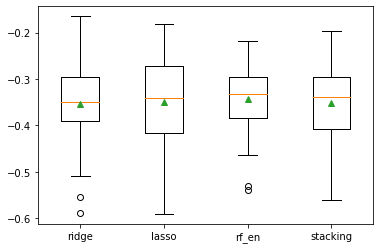

In [42]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(f'{name} {mean(scores):.3f} {std(scores):.3f}')
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
!pip install numpy 